## Capstone  - NYC Tree Census - Exploratory Data Analysis

### Table of contents
1. [Background](#Background)
     -   1.1 [Data Source](#Data-Source)
     -   1.2 [Objective](#Objective)
     
     
2. [Loading Data](#Loading-Data)
     -   2.1 [Load libraries](#Load-libraries)
     -   2.2 [Load Dataset](#Load-Dataset)
     
     
3. [Data Quality Check](#Data-Quality-Check)
     -   3.1 [Duplicate Values](#Duplicate-Values)
     -   3.2 [Missing Values](#Missing-Values)
     -   3.3 [Outliers](#Outliers)
     
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)   
     -   4.1 [Count of Trees by health status](#Count-of-Trees-by-health-status)
     -   4.2 [Countof Trees by location and health](#Count-of-Trees-by-location-and-health)
     -   4.3 [Diameter of Trees](#Diameter-of-Trees)
           - 4.3.1[Distribution by diameter](#Distribution-by-diameter)
           - 4.3.2[Distribution by diameter >50inches](#Distribution-by-diameter->50-inches)
           - 4.3.3[Distribution by diameter <50inches](#Distribution-by-diameter-<50-inches)
     -   4.4 [Species of Trees](#Species-of-Trees)
           - 4.4.1[Tree health by Species](#Tree-health-by-species)
     -   4.5 [Stewardship for trees](#Stewardship-for-trees)
           - 4.5.1[Stewardship by health](#Stewardship-by-health)
           - 4.5.2[Stewardship by borough](#Stewardship-by-borough)       
     -   4.6 [Guards](#Guards)
           - 4.6.1[Guards by health](#Guards-by-health)
           - 4.6.2[Guards by borough](#Guards-by-borough)    
     -   4.7 [Sidewalks](#Sidewalks)
           - 4.7.1[Sidewalks by health](#Sidewalks-by-health)
           - 4.7.2[Sidewalks by borough](#Sidewalks-by-borough)
     -   4.8 [User's Type](#User's-Type)
     -   4.9 [Problems in Trees](#Problems-in-Trees)
     -   4.10 [Problems in Roots](#Problems-in-Roots)
           - 4.10.1[Root Stones](#Root-Stones)
           - 4.10.2[Root Grate](#Root-Grate)
           - 4.10.3[Root Others](#Root-Others)
     -   4.11 [Problems in Trunk](#Problems-in-Trunk)
           - 4.11.1[Trunk Wire](#Trunk-Wire)
           - 4.11.2[Trunk Light](#Trunk-Light)
           - 4.11.3[Trunk Others](#Trunk-Others)
     -   4.12 [Problems in Branches](#Problems-in-Branches)
           - 4.12.1[Branch Light](#Branch-Light)
           - 4.12.2[Branch Shoes](#Branch-Shoes)
           - 4.12.3[Branch Others](#Branch-Others)
     -   4.13 [Mapping trees in NYC by their health](#Mapping-trees-in-NYC-by-their-health) 
     -   4.14 [Tree health by boroughs](#Tree-health-by-borough)
     -   4.15 [Tree health by Neighbourhood tabulation Areas](#Tree-health-by-Neighbourhood-Tabulation-Area)
5. [Save final Data](#Save-Final-Data)
     -   5.1 [Drop unnecessary features](#Drop-unnecessary-features) 
     -   5.2 [Save cleaned data](#Save-cleaned-data) 

### Background
    
TreesCount! 2015-2016, New York City's third street tree census, brought more than 2,200 volunteers together in the largest participatory municipal urban forestry project in United States history. Using both high tech tools and survey wheels, tape measures, and tree identification keys, citizen mappers helped us create a spatially accurate digital inventory of NYC’s street trees.

Using this data, one can explore city’s urban forest, learn about the species, size and ecological benefits of individual trees, record  tree care activities, and share stewardship actions and  favorite trees with friends.

#### 1.1 Data Source

Using NYC Open Data's [2015 Street Tree Census Data Set](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35) (to download the dataset, click **Export** for the non-geospatial version)

#### 1.2 Problem Statement / Objective
To identify factors/variables that contribute to the health of the tree and develop a machine learning model to predict the health of the tree 

### Loading Data 

#### 2.1 Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded all the required libraries.
</div>

#### 2.2 Load Data Set 

In [3]:
df=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded the data.
</div>

In [4]:
df.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [4]:
df.shape

(683788, 45)

### Data Quality Check

#### 3.1 Duplicate Values

In [5]:
if len(df[df.duplicated(keep=False)]) ==0:
    print("There is no duplicated records in the NYC Tree dataset")
else:
    print("There are duplicated records in the NYC Tree dataset. Please indetify the reasons and work to fix")

There is no duplicated records in the NYC Tree dataset


<div class="alert alert-success">
  <strong>Success!</strong> There is no duplicated values in the dataset.
</div>

#### 3.2 Missing Values

In [6]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state      

In [7]:
tree_status = df.groupby('status').size()
tree_status

status
Alive    652173
Dead      13961
Stump     17654
dtype: int64

In [8]:
tree = df.dropna(axis = 0, how ='any')

In [9]:
tree.isnull().sum()

tree_id             0
block_id            0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_latin           0
spc_common          0
steward             0
guards              0
sidewalk            0
user_type           0
problems            0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
address             0
postcode            0
zip_city            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
nta                 0
nta_name            0
boro_ct             0
state               0
latitude            0
longitude           0
x_sp                0
y_sp                0
council district    0
census tract        0
bin                 0
bbl                 0
dtype: int

In [10]:
tree.shape

(642961, 45)

<div class="alert alert-success">
  <strong>Success!</strong> Successfully removed the stump and dead tree from the dataset along with 9559 rows as they were missing location.
</div>

#### 3.3 Data type conversion

In [12]:
tree['created_at']=pd.to_datetime(tree['created_at'])

C:\Users\parij\AppData\Local\Temp/ipykernel_21892/2473065387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['created_at']=pd.to_datetime(tree['created_at'])


<div class="alert alert-success">
  <strong>Success!</strong> Successfully converted the data type</div>

### Exploratory Data Analysis

#### 4.1 Count of Trees by health status

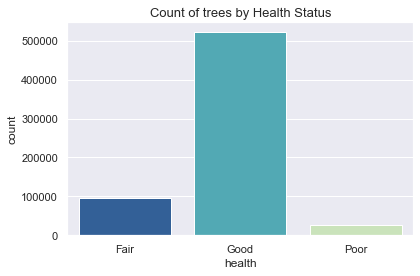

In [13]:
sns.set_theme(style='darkgrid')
sns.countplot(x="health", data=tree, palette="YlGnBu_r")
plt.title('Count of trees by Health Status', size=13)
plt.tight_layout()
plt.show()

In [14]:
# percent = len(tree[tree['health']=='Good'])/len(tree)
# percent

In [15]:
round(tree.health.value_counts(normalize=True), 4) * 100

Good    81.14
Fair    14.77
Poor     4.10
Name: health, dtype: float64

<div class="alert alert-info">
  <strong>Finding!</strong> 81% of trees in dataset are in good health.
</div>

#### 4.2 Tree count by location

In [16]:
# To get unique values in curb_loc
print(f"Unique location of the tree: {tree['curb_loc'].unique()}")

Unique location of the tree: ['OnCurb' 'OffsetFromCurb']


In [17]:
curb_df = tree[['curb_loc','health','tree_id']]

In [18]:
curb_df = curb_df.groupby(['curb_loc','health']).agg(h_count =('health', 'count'))
curb_df = curb_df.reset_index()

In [19]:
curb_df

,curb_loc,health,h_count
0,OffsetFromCurb,Fair,3892
1,OffsetFromCurb,Good,20257
2,OffsetFromCurb,Poor,912
3,OnCurb,Fair,91052
4,OnCurb,Good,501417
5,OnCurb,Poor,25431


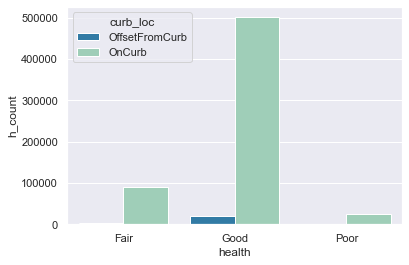

In [20]:
sns.barplot(x = 'health',
            y = 'h_count',
            hue = 'curb_loc',
            data = curb_df,
           palette='YlGnBu_r')
 
# Show the plot
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees in dataset are planted on the curb.
</div>

#### 4.3 Diameter of the Trees 

In [21]:
round(tree[['health', 'tree_dbh']].groupby('health', as_index=False).mean(), 2)

,health,tree_dbh
0,Fair,11.01
1,Good,11.99
2,Poor,9.03


In [22]:
tree[['health', 'tree_dbh']].groupby('health', as_index=False).median()

,health,tree_dbh
0,Fair,9.0
1,Good,10.0
2,Poor,7.0


<div class="alert alert-info">
  <strong>Finding!</strong> Healthy trees (Good and Fair) have diameter larger than trees in poor health.
</div>

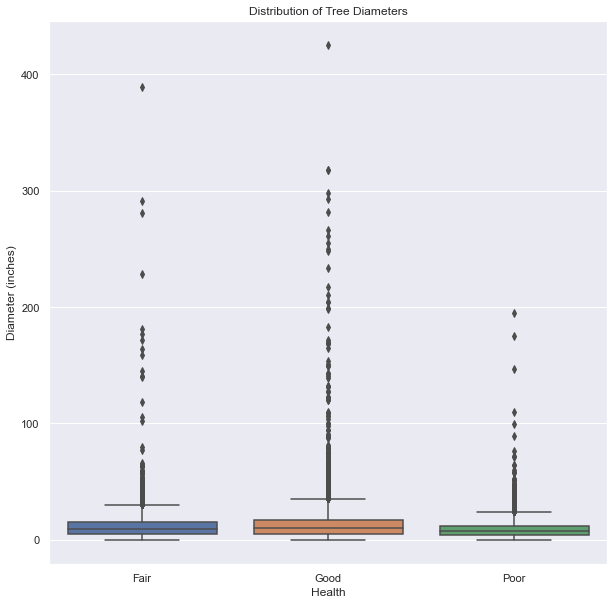

In [23]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='tree_dbh', data=tree)
ax.set_xlabel('Health')
ax.set_ylabel('Diameter (inches)')
ax.set_title('Distribution of Tree Diameters')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> The diameter breast at height for trees has a wide range with few outliers
</div>

In [24]:
tree['tree_dbh'].describe()

count    642961.000000
mean         11.721552
std           8.641866
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

#### 4.3.1 Distribution by diameter 

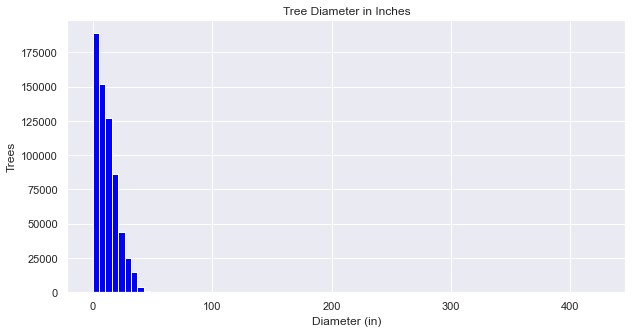

In [25]:
# distribution plot
plt.figure(figsize=(10, 5))

tree.tree_dbh.plot(kind='hist', bins=80, color='blue', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

In [11]:
# number of rows that have 0 as the diameteer
tree[tree.tree_dbh == 0].shape

(220, 45)

In [13]:
#drop indexes for which column tree diameter value is 0
tree.drop(tree[tree['tree_dbh'] == 0].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
tree.shape

(642741, 45)

In [ ]:
tree_50 = tree[tree.tree_dbh > 50]
tree_50.shape

<div class="alert alert-info">
  <strong>Finding!</strong> In this large dataset there are only 353 trees with diameter more than 50 inches
</div>

#### 4.3.2 Distribution by diameter more than 50 

In [ ]:
# distribution plot
plt.figure(figsize=(10, 5))

tree_50.tree_dbh.plot(kind='hist', bins=80, color='blue', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

#### 4.3.3 Distribution by diameter less than 50 

In [ ]:
tree_1to50 = tree[tree.tree_dbh < 50]
tree_1to50.shape

In [ ]:
# distribution plot
plt.figure(figsize=(10, 5))

tree_1to50.tree_dbh.plot(kind='hist', bins=80, color='blue', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

#### 4.4 Species of the Trees - Common Name 

In [ ]:
tree_spc = tree.groupby('spc_common').size().sort_values(ascending=False)
tree_spc

<div class="alert alert-info">
  <strong>Finding!</strong> There are 132 kinds of trees in New York city and London planetree is the most common tree in the city
</div>

In [ ]:
tree_spc.plot(kind='bar',color='blue',figsize=(40, 10))
plt.show()

#### 4.4.1 Tree Health by Species

In [ ]:
# prepare data for stacked bar 
species = tree.groupby(['spc_common']).health.value_counts(normalize=True).unstack()

# plot stacked bar graph
species.plot(kind='bar', stacked=True, figsize=(40,15), color=['orange', 'green', 'red'], alpha=0.7)

<div class="alert alert-info">
  <strong>Finding!</strong> All Pitch Pine trees in New York city were healthy in 2015 </div>

#### 4.5 Stewardship for Trees

Indicates the number of unique signs of stewardship observed forthis tree. Not recorded for stumps or dead trees.

Below is a short list of the most common examples of what counts as one stewardship activity:
- Helpful tree guards that do not appear professionally installed
- Mulch or woodchips
- Intentionally-planted flowers or other plants
- Signs related to care of the tree or bed, other than those installed by Parks
- Decorations (not including wires or lights added to the tree)
- Seating in the tree bed, usually as part of the tree guard
- Viewing someone performing a stewardship activity during the survey

#### 4.5.1 Stewardship by health

In [ ]:
round(tree.groupby('health')['steward'].value_counts(normalize=True), 4) * 100

In [ ]:
sns.catplot(x='health', hue='steward', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Stewardship by tree health')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> There is not a major difference between distribution of tree stewardish by their health status</div>

#### 4.5.2 Stewardship by Borough

In [ ]:
round(tree.groupby('borough')['steward'].value_counts(normalize=True), 4) * 100

In [ ]:
sns.catplot(x='borough', hue='steward', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Stewardship by Boroughs')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Unlike other Boroughs, Manhattan has only 47 percent of trees with no stewardship activities</div>

#### 4.6 Guards

Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Values Harmful, Helpful, and Unsure all indicate that a tree guard is present. A tree guard is considered 'helpful' if it doesn't impede water getting to the tree and does not raise the soil level or trap debris in the pit.

#### 4.6.1 Guards by health of trees

In [ ]:
round(tree.groupby('health')['guards'].value_counts(normalize=True), 4) * 100

In [ ]:
sns.catplot(x='health', hue='guards', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Guards by health of the trees')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Helpful guards have 82% of trees are in good health followed by trees with no guards. And, most of the trees in good health have no guards</div>

#### 4.6.2 Guards by Borough

In [ ]:
round(tree.groupby('borough')['guards'].value_counts(normalize=True), 4) * 100

In [ ]:
sns.catplot(x='borough', hue='guards', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Guards by Boroughs')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> In Manhattan only 55% of trees have no guards.In other Boroughs the percent of trees with no gurads arrange between 80 to 95% </div

#### 4.7 Sidewalks 
Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted.

#### 4.7.1 Sidewalks by health of  trees 

In [ ]:
round(tree.groupby('health')['sidewalk'].value_counts(normalize=True), 4) * 100

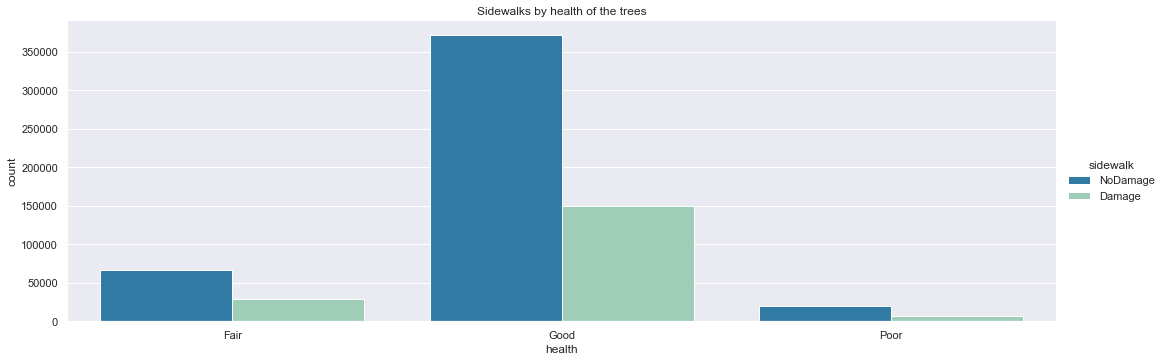

In [28]:
sns.catplot(x='health', hue='sidewalk', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Sidewalks by health of the trees')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Around 71% of trees have no sidewalk damange and 28% have damaged sidewalk, irrespective of health</div

#### 4.7.2 Sidewalk by Boroughs

In [29]:
round(tree.groupby('borough')['sidewalk'].value_counts(normalize=True), 4) * 100

borough        sidewalk
Bronx          NoDamage    70.78
               Damage      29.22
Brooklyn       NoDamage    65.52
               Damage      34.48
Manhattan      NoDamage    75.75
               Damage      24.25
Queens         NoDamage    71.78
               Damage      28.22
Staten Island  NoDamage    77.08
               Damage      22.92
Name: sidewalk, dtype: float64

<div class="alert alert-info">
  <strong>Finding!</strong> Compared to other boroughs, Brooklyn has more sidewalk damaage close to the trees</div

#### 4.8 User Types
This field describes the category of user who collected this tree point's data

In [30]:
# To get unique values in curb_loc
print(f"Status of Tree: {tree['user_type'].unique()}")

Status of Tree: ['TreesCount Staff' 'Volunteer' 'NYC Parks Staff']


In [31]:

tree.groupby('user_type').size().sort_values(ascending=False)

user_type
TreesCount Staff    277513
Volunteer           204729
NYC Parks Staff     160719
dtype: int64

<div class="alert alert-info">
  <strong>Finding!</strong> Tree data was collected byTreesCount Staff, Volunteers and NYC Park Staff.More than 40% of tree data was collected by Tree Count staff</div

#### 4.9 Problems 

In [32]:
# To get unique values in curb_loc
print(f"Status of Tree: {tree['problems'].unique()}")

Status of Tree: ['None' 'Stones' 'MetalGrates' 'RootOther' 'Stones,BranchOther'
 'TrunkLights,BranchLights' 'RootOther,TrunkOther,BranchOther'
 'BranchOther' 'Stones,BranchLights' 'TrunkOther,BranchLights'
 'MetalGrates,TrunkOther' 'TrunkOther' 'Stones,WiresRope' 'BranchLights'
 'WiresRope,BranchOther' 'RootOther,BranchOther'
 'Stones,WiresRope,BranchLights' 'WiresRope' 'WiresRope,BranchLights'
 'Stones,TrunkOther' 'WiresRope,TrunkLights,BranchLights'
 'Stones,RootOther' 'Stones,BranchLights,BranchOther'
 'Stones,RootOther,BranchLights' 'MetalGrates,BranchOther'
 'Stones,RootOther,TrunkOther' 'RootOther,TrunkOther'
 'Stones,TrunkOther,BranchLights,BranchOther'
 'Stones,TrunkOther,BranchOther' 'RootOther,BranchLights'
 'TrunkOther,BranchOther' 'RootOther,WiresRope,BranchLights'
 'Stones,TrunkOther,BranchLights' 'BranchLights,Sneakers'
 'Stones,RootOther,TrunkOther,BranchLights'
 'MetalGrates,TrunkOther,BranchOther' 'TrunkLights,BranchOther'
 'TrunkLights' 'Stones,RootOther,BranchOther' 

In [33]:
tree_problems = tree.problems

In [34]:
tree_problems.head(5)

0      None
1    Stones
2      None
3    Stones
4    Stones
Name: problems, dtype: object

In [35]:
problems = [] 

for item in tree_problems:
    if ',' in item:
        split_str = item.split(',')
        problems.append(split_str)
    else:
        problems.append(item)

In [36]:
problems

['None',
 'Stones',
 'None',
 'Stones',
 'Stones',
 'None',
 'None',
 'MetalGrates',
 'None',
 'None',
 'None',
 'Stones',
 'RootOther',
 ['Stones', 'BranchOther'],
 'None',
 'None',
 'None',
 ['TrunkLights', 'BranchLights'],
 'Stones',
 'None',
 ['RootOther', 'TrunkOther', 'BranchOther'],
 'None',
 'BranchOther',
 'None',
 'Stones',
 ['Stones', 'BranchLights'],
 'None',
 'None',
 ['TrunkOther', 'BranchLights'],
 'None',
 'Stones',
 ['MetalGrates', 'TrunkOther'],
 ['MetalGrates', 'TrunkOther'],
 'None',
 'None',
 'None',
 'Stones',
 'None',
 'Stones',
 'None',
 'None',
 'None',
 'Stones',
 'Stones',
 'None',
 'None',
 'None',
 'TrunkOther',
 'None',
 'TrunkOther',
 'None',
 'None',
 ['Stones', 'BranchLights'],
 ['Stones', 'WiresRope'],
 'None',
 'BranchLights',
 'Stones',
 'None',
 'None',
 'Stones',
 ['Stones', 'BranchOther'],
 'None',
 'None',
 'None',
 'None',
 'TrunkOther',
 'Stones',
 'None',
 'None',
 'Stones',
 'None',
 ['Stones', 'BranchLights'],
 'None',
 ['RootOther', 'TrunkO

In [37]:
def atomic_flatten(iterable, flattened):
    try:
        iter(iterable)
        if type(iterable) not in [str, bytes]:
            for item in iterable:
                atomic_flatten(item, flattened)
        else:
            flattened.append(iterable)
    except:
        flattened.append(iterable)
    return flattened

# Code source: https://www.alpharithms.com/how-to-flatten-lists-in-python-045714/

In [38]:
flat = atomic_flatten(problems, [])

flat

In [39]:
problem_list = pd.Series(flat)

problem_list.value_counts()

None            419867
Stones          138306
BranchLights     61801
TrunkOther       32117
RootOther        30015
BranchOther      23981
WiresRope        13165
MetalGrates       3442
TrunkLights       1023
Sneakers           407
dtype: int64

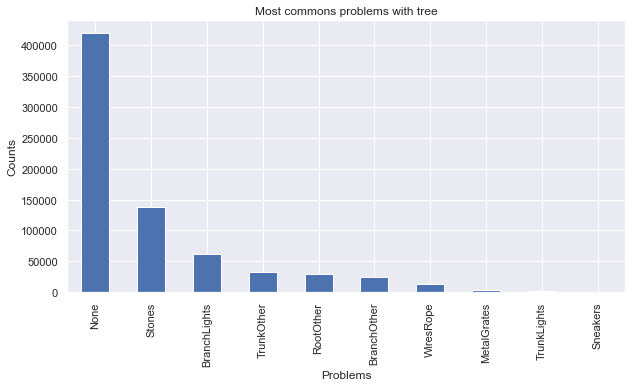

In [40]:
problem_list.value_counts().plot(kind='bar', title='Most commons problems with tree', figsize=(10, 5))
plt.xlabel('Problems')
plt.ylabel('Counts')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> One of the most common problem among the trees in New York city is stones</div

In [19]:
# Lets add a column 'Problem_Count'. The column represnts the number of problems present in a tree
tree['problem_count'] = (tree[['root_stone','root_grate','root_other','trunk_wire','trnk_light','trnk_other','brch_light','brch_shoe','brch_other']] == 'Yes').sum(axis=1)

C:\Users\parij\AppData\Local\Temp/ipykernel_19788/172155581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['problem_count'] = (tree[['root_stone','root_grate','root_other','trunk_wire','trnk_light','trnk_other','brch_light','brch_shoe','brch_other']] == 'Yes').sum(axis=1)


In [20]:
tree.shape

(642741, 46)

<div class="alert alert-success">
  <strong>Success!</strong> Successfully added cloumn with counts of problems type</div>

#### 4.10 Problems with Root 
There are three problems related to roots - root_stone, root_grate and root_other

#### 4.10.1 Root Stone

In [46]:
tree.groupby('root_stone').size()

root_stone
No     504655
Yes    138306
dtype: int64

In [47]:
round(tree.groupby('health')['root_stone'].value_counts(normalize=True), 4) * 100

health  root_stone
Fair    No            75.54
        Yes           24.46
Good    No            78.91
        Yes           21.09
Poor    No            80.70
        Yes           19.30
Name: root_stone, dtype: float64

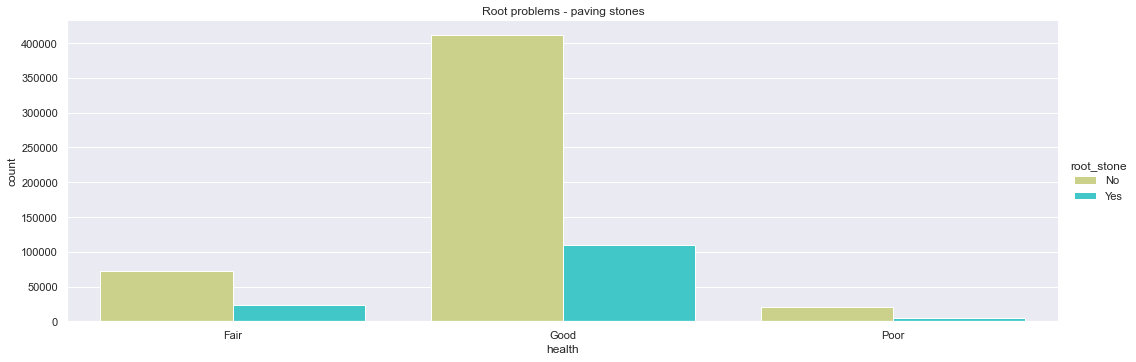

In [48]:
sns.catplot(x='health', hue='root_stone', kind='count', palette='rainbow_r', data=tree, aspect=3)
plt.title('Root problems - paving stones')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a root problem caused by paving stones
in tree bed.However, there is some root problems in healthy trees due to paving stones in tree beds
</div

#### 4.10.2 Root Grate

In [49]:
tree.groupby('root_grate').size()

root_grate
No     639519
Yes      3442
dtype: int64

In [50]:
round(tree.groupby('health')['root_grate'].value_counts(normalize=True), 4) * 100

health  root_grate
Fair    No            99.14
        Yes            0.86
Good    No            99.54
        Yes            0.46
Poor    No            99.06
        Yes            0.94
Name: root_grate, dtype: float64

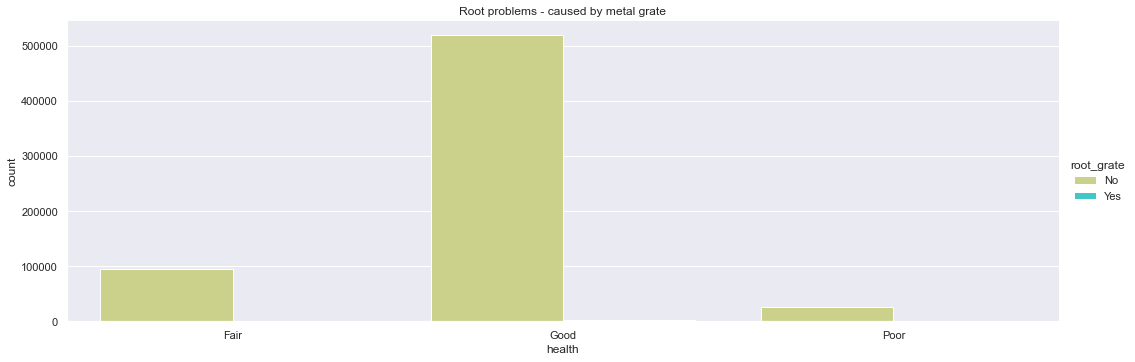

In [51]:
sns.catplot(x='health', hue='root_grate', kind='count', palette='rainbow_r', data=tree, aspect=3)
plt.title('Root problems - caused by metal grate')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a root problem caused by metal grates
in tree bed. 
</div

#### 4.10.3 Root  Others

In [52]:
tree.groupby('root_other').size()

root_other
No     612946
Yes     30015
dtype: int64

In [53]:
round(tree.groupby('health')['root_other'].value_counts(normalize=True), 4) * 100

health  root_other
Fair    No            93.22
        Yes            6.78
Good    No            95.88
        Yes            4.12
Poor    No            92.03
        Yes            7.97
Name: root_other, dtype: float64

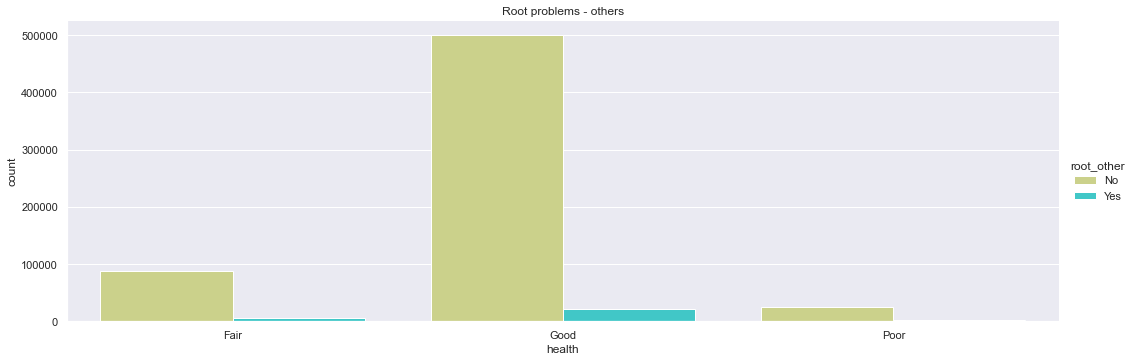

In [54]:
sns.catplot(x='health', hue='root_other', kind='count', palette='rainbow_r', data=tree, aspect=3)
plt.title('Root problems - others')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of any other root problem.
</div

#### 4.11 Problems with Trunk 
There are three problems related to trunk - trunk_wire, trunk_ligh and trunk_other.

#### 4.11.1 Trunk Wire

In [55]:
tree.groupby('trunk_wire').size()

trunk_wire
No     629796
Yes     13165
dtype: int64

In [56]:
round(tree.groupby('health')['trunk_wire'].value_counts(normalize=True), 4) * 100

health  trunk_wire
Fair    No            97.11
        Yes            2.89
Good    No            98.15
        Yes            1.85
Poor    No            97.17
        Yes            2.83
Name: trunk_wire, dtype: float64

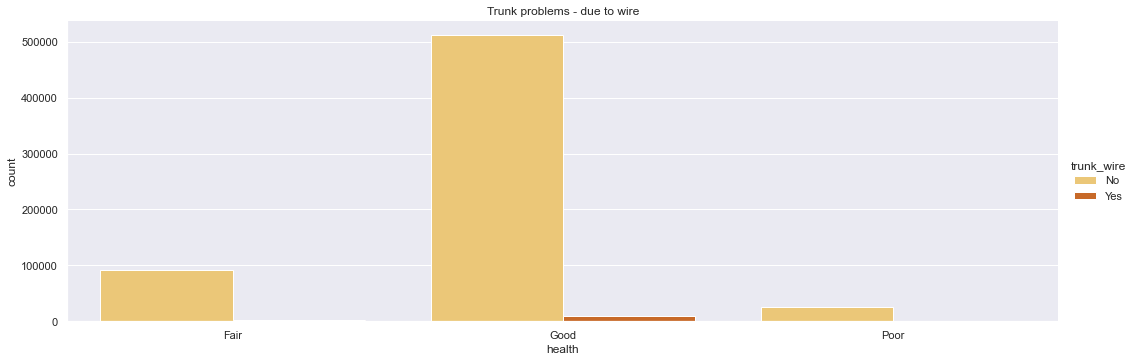

In [57]:
sns.catplot(x='health', hue='trunk_wire', kind='count', palette='YlOrBr', data=tree, aspect=3)
plt.title('Trunk problems - due to wire')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a trunk problem caused by wires or rope
wrapped around the trunk.
</div

#### 4.11.2 Trunk Light

In [58]:
tree.groupby('trnk_light').size()

trnk_light
No     641938
Yes      1023
dtype: int64

In [59]:
round(tree.groupby('health')['trnk_light'].value_counts(normalize=True), 4) * 100

health  trnk_light
Fair    No            99.77
        Yes            0.23
Good    No            99.86
        Yes            0.14
Poor    No            99.77
        Yes            0.23
Name: trnk_light, dtype: float64

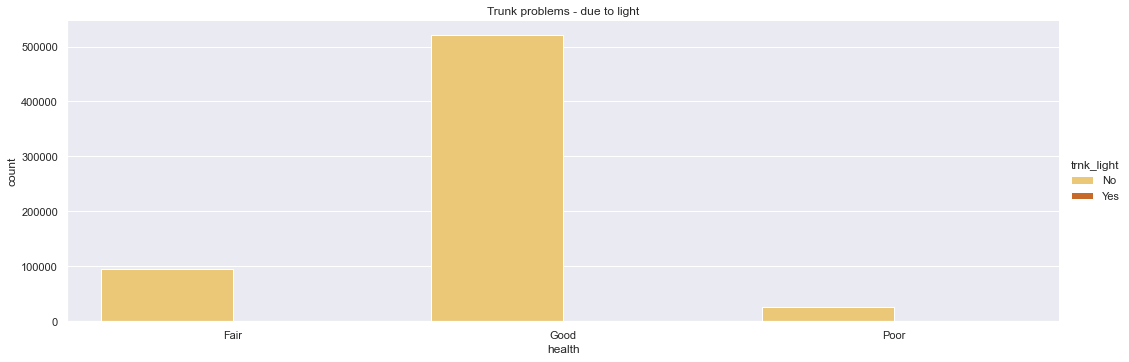

In [60]:
sns.catplot(x='health', hue='trnk_light', kind='count', palette='YlOrBr', data=tree, aspect=3)
plt.title('Trunk problems - due to light')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a trunk problem caused by lighting installed on the tree.
</div

#### 4.11.3 Trunk Others

In [61]:
tree.groupby('trnk_other').size()

trnk_other
No     610844
Yes     32117
dtype: int64

In [62]:
round(tree.groupby('health')['trnk_other'].value_counts(normalize=True), 4) * 100

health  trnk_other
Fair    No            90.24
        Yes            9.76
Good    No            96.36
        Yes            3.64
Poor    No            85.35
        Yes           14.65
Name: trnk_other, dtype: float64

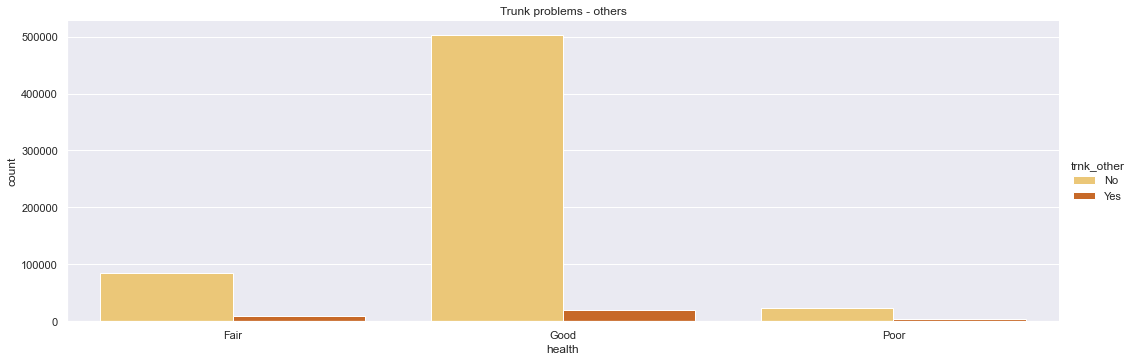

In [63]:
sns.catplot(x='health', hue='trnk_other', kind='count', palette='YlOrBr', data=tree, aspect=3)
plt.title('Trunk problems - others')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of any other trunk problem.
</div

#### 4.12 Problems with Branches

There are three problems related to branch - brch_light, branch_shoe and brch_other.

#### 4.12.1 Branch Light

In [64]:
tree.groupby('brch_light').size()

brch_light
No     581160
Yes     61801
dtype: int64

In [65]:
round(tree.groupby('health')['brch_light'].value_counts(normalize=True), 4) * 100

health  brch_light
Fair    No            88.62
        Yes           11.38
Good    No            90.67
        Yes            9.33
Poor    No            91.10
        Yes            8.90
Name: brch_light, dtype: float64

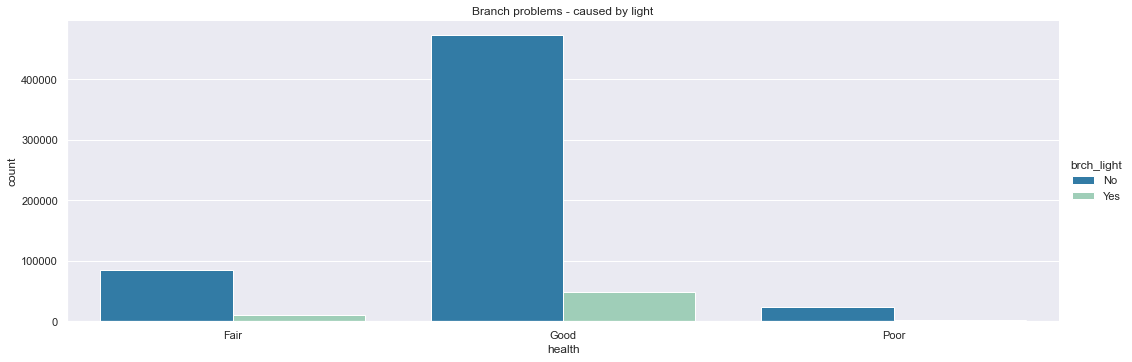

In [66]:
sns.catplot(x='health', hue='brch_light', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Branch problems - caused by light')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of problem caused by light.
</div

#### 4.12.2 Branch Shoes

In [67]:
tree.groupby('brch_shoe').size()

brch_shoe
No     642554
Yes       407
dtype: int64

In [68]:
round(tree.groupby('health')['brch_shoe'].value_counts(normalize=True), 4) * 100

health  brch_shoe
Fair    No           99.90
        Yes           0.10
Good    No           99.95
        Yes           0.05
Poor    No           99.88
        Yes           0.12
Name: brch_shoe, dtype: float64

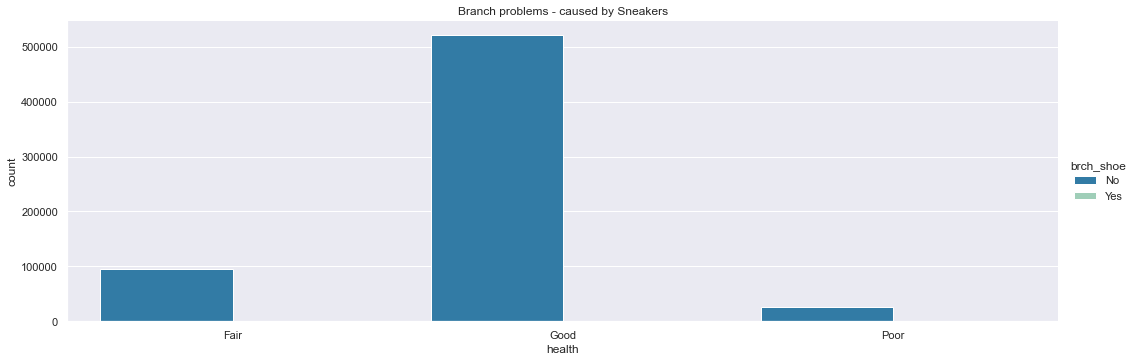

In [69]:
sns.catplot(x='health', hue='brch_shoe', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Branch problems - caused by Sneakers')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a branch problem caused by sneakers in
the branches.
</div

#### 4.12.3 Branch Others

In [70]:
tree.groupby('brch_other').size()

brch_other
No     618980
Yes     23981
dtype: int64

In [71]:
round(tree.groupby('health')['brch_other'].value_counts(normalize=True), 4) * 100

health  brch_other
Fair    No            91.81
        Yes            8.19
Good    No            97.58
        Yes            2.42
Poor    No            86.35
        Yes           13.65
Name: brch_other, dtype: float64

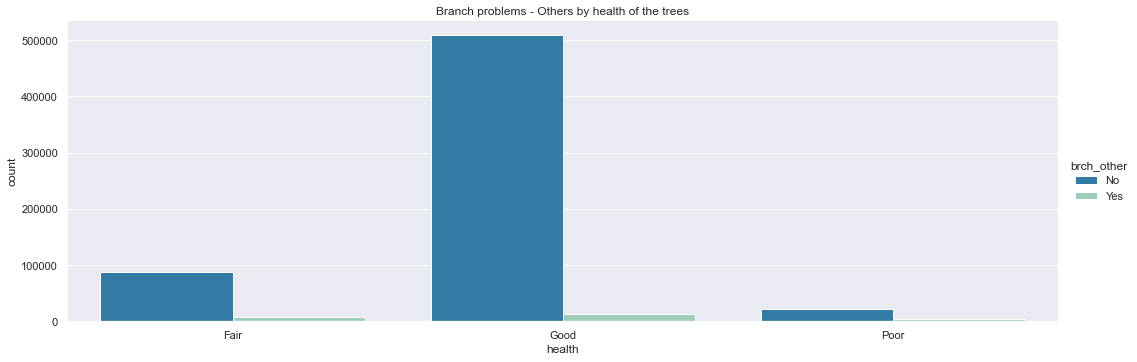

In [72]:
sns.catplot(x='health', hue='brch_other', kind='count', palette='YlGnBu_r', data=tree, aspect=3)
plt.title('Branch problems - Others by health of the trees')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees have no presence of a branch problem.
</div

#### 4.13 Mapping trees in New York City by health 

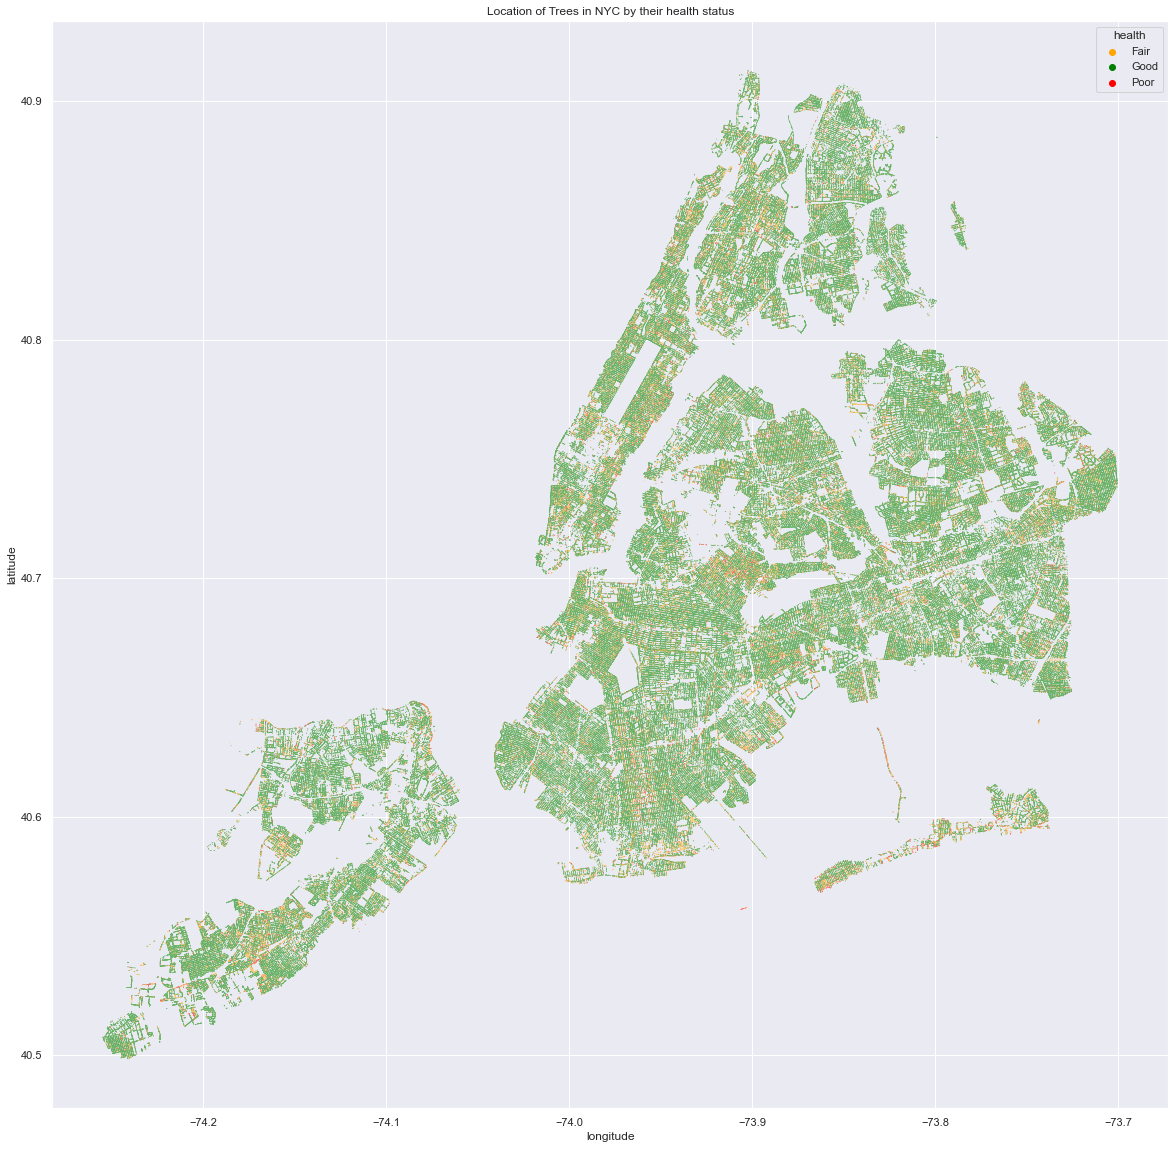

In [73]:
color_dict = dict({'Good':'green',
                  'Fair':'orange',
                  'Poor': 'red'})

plt.figure(figsize=(20, 20))
sns.scatterplot(x ='longitude', y = 'latitude', marker='.', s=2, hue ='health', data = tree, palette=color_dict )
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
plt.title('Location of Trees in NYC by their health status')
plt.show()

#### 4.14 Tree Health in bororughs  

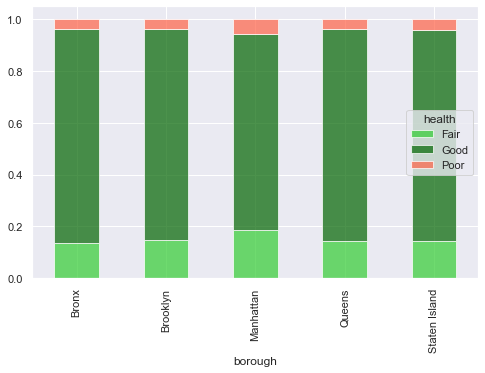

In [74]:
# prepare data for stacked bar 
borough = tree.groupby(['borough']).health.value_counts(normalize=True).unstack()

# plot stacked bar graph
p1 = borough.plot(kind='bar', stacked=True, figsize=(8,5), color=['limegreen', 'darkgreen', 'tomato'], alpha=0.7)

<div class="alert alert-info">
  <strong>Finding!</strong> Manhattan seems to have higher number of Poor and fair health trees as compared to other boroughs in New York City.
</div

#### 4.15 Tree Health by Neighbourhood

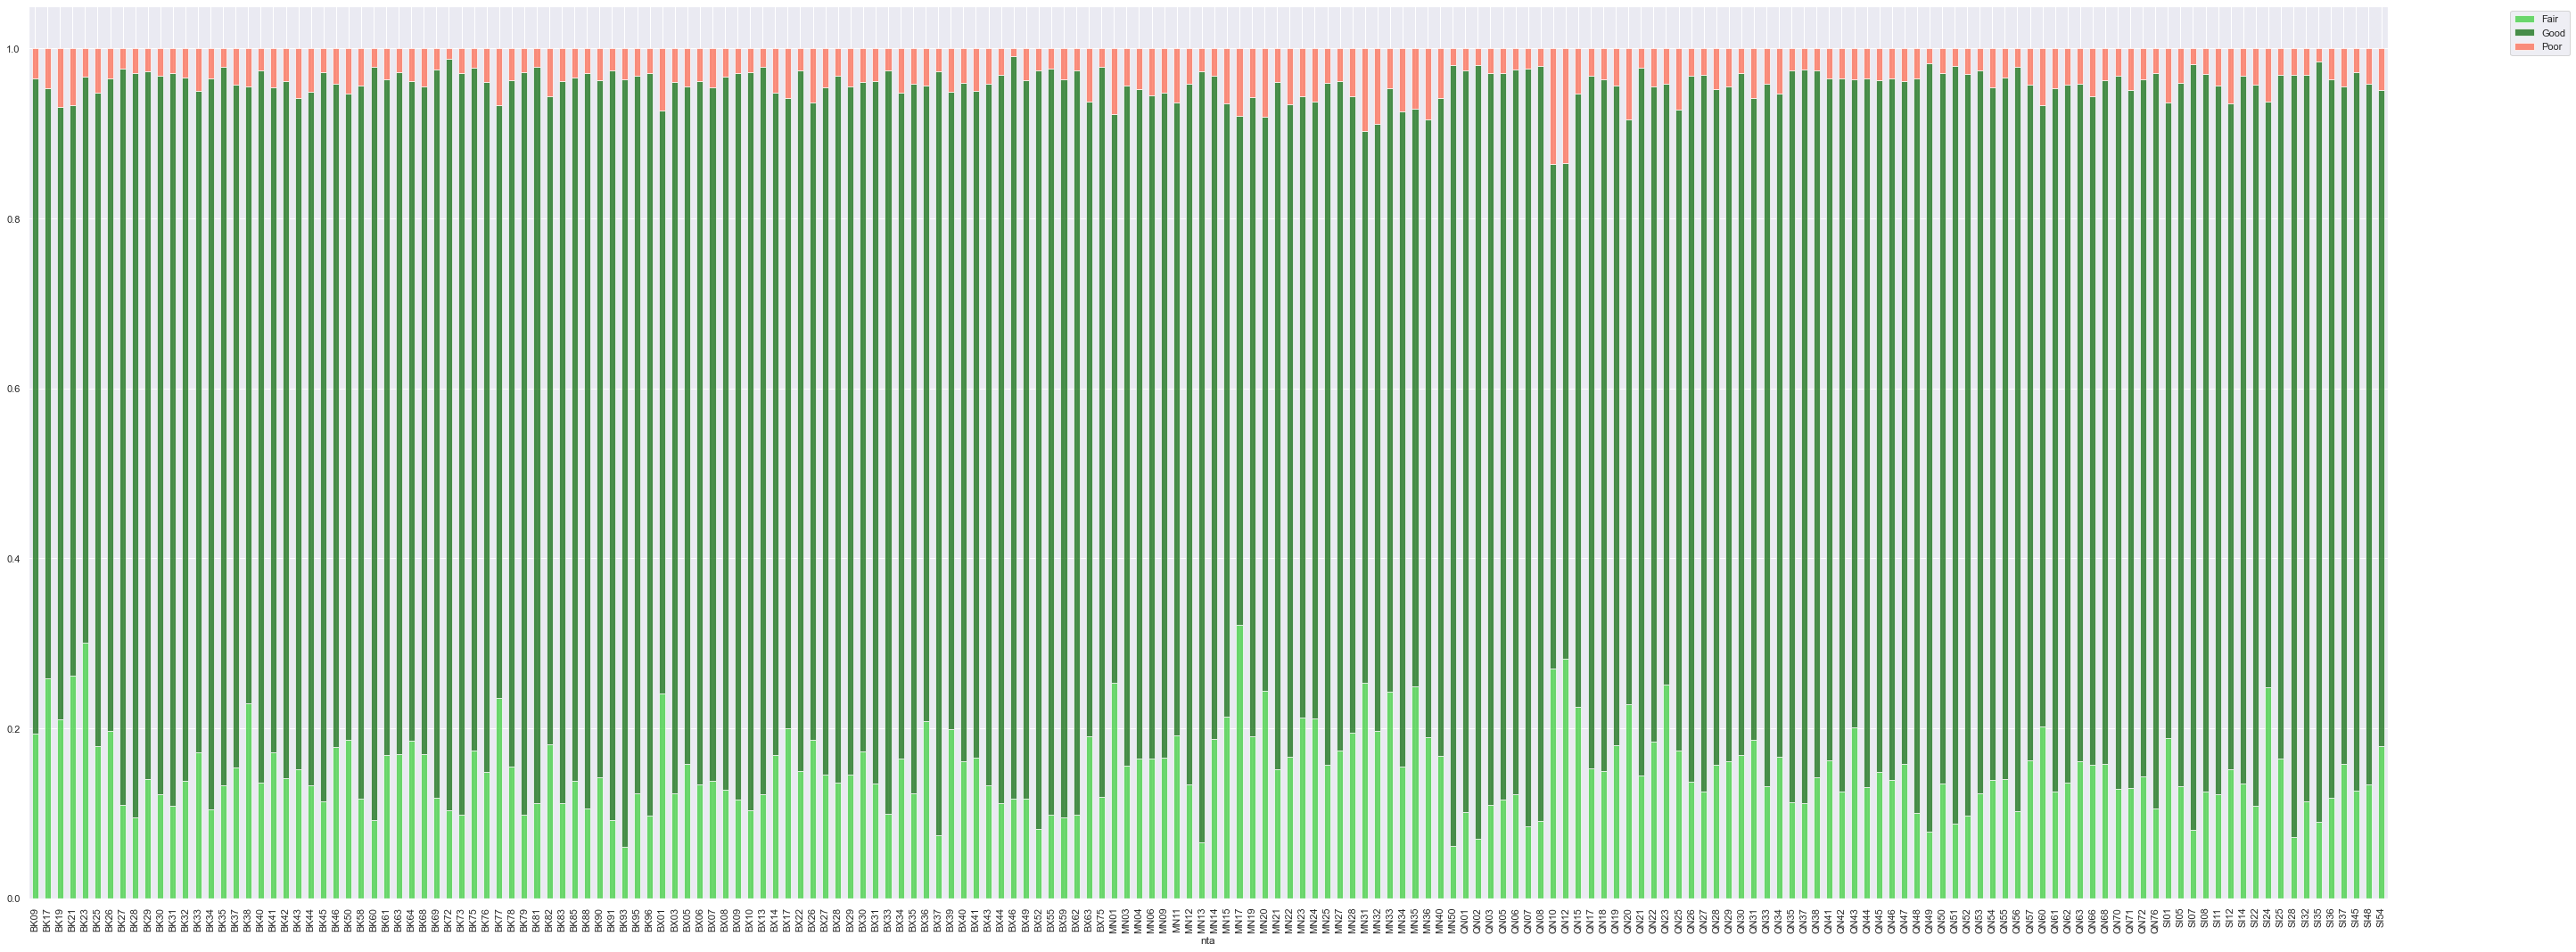

In [75]:
# prepare data for stacked bar 
nta = tree.groupby(['nta']).health.value_counts(normalize=True).unstack()

# plot stacked bar graph
nta.plot(kind='bar', stacked=True, figsize=(40,15), color=['limegreen', 'darkgreen', 'tomato'], alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> There are few Neighborhood Tabulation Areas with more than 20% of its trees in fair health. 

### Saving final data for next step 

#### 5.1 Drop unnecessary features 

In [21]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl', 'problem_count'],
      dtype='object')

In [22]:
tree.shape

(642741, 46)

In [23]:
tree = tree[['tree_id', 'block_id', 'created_at', 'tree_dbh', 
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'borough',  
       'latitude', 'longitude', 'x_sp', 'y_sp','problem_count']]

<div class="alert alert-success">
  <strong>Success!</strong> Successfully dropped following columns: address,postcode, bin, bbl, community board, zip_city, borocode, state, stump_dbh, cncldist, st_assem, st_senate,nta,nta_name, boro_ct,council district,census tract,    </div>

#### 5.2 Save the cleaned data 

In [24]:
#saving the cleaned_file 
tree.to_csv('clean_trees.csv')

<div class="alert alert-success">
  <strong>Success!</strong> Successfully saved cleaned data in csv file for next steps </div>